<a href="https://colab.research.google.com/github/rjnakano/manejo-inventarios-pdg/blob/main/Notebooks%5CTDGClusteringJerarquicoV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install hdbscan

     |████████████████████████████████| 6.4MB 4.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311693 sha256=ee6c99bdd498339dcf8b4d039f3b4bde91c24d3146793ca5c7253504f0be7be0
  Stored in directory: /root/.cache/pip/wheels/42/63/fb/314ad6c3b270887a3ecb588b8e5aac50b0fad38ff89bb6dff2
Successfully built hdbscan


In [2]:
!pip install gower

  Created wheel for gower: filename=gower-0.0.5-cp37-none-any.whl size=4232 sha256=60681591043488d1ccf4dcc60be19d9df4ec9207b57911bf626f9e33da7cf667
  Stored in directory: /root/.cache/pip/wheels/c0/09/9b/072d54d6ced0f43a179852e3f09532d0131e25ff7cb4e5ee75
Successfully built gower


In [3]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import hdbscan
import gower

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()

In [4]:
plot_kwds = {'alpha' : 0.5, 's' : 1, 'linewidths':0}

In [5]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [87]:
# Dataset de inventarios sin dimensiones de los productos
dataNoDims = pd.read_csv("/content/gdrive/MyDrive/TDGdata/dfNoDims.csv")

In [88]:
dataNoDims.head(5)

,AISLE,IG,HTS,PLANNING,ABC,UOM,CAT,COSTX,QTYVAR,CONTRPERC
0,17,IG56,HTS119,1/1,B,PC,CAT17,-289.8802,-2.63,0.01
1,17,IG56,HTS119,1/1,B,PC,CAT17,289.5527,25.00,0.00
2,17,IG56,HTS119,1/1,C,PC,CAT17,1111.3121,50.00,0.00
3,17,IG56,HTS119,1/1,B,PC,CAT17,-266.8633,-9.09,0.00
4,15,IG56,HTS119,1/1,C,PC,CAT17,-517.0436,-11.11,0.00


In [89]:
dataNoDims.shape

(16244, 10)

**CAT-ABC vs COSTX-QTYVAR**

In [90]:
data1 = dataNoDims

In [91]:
data1['CAT'] = data1['CAT'] + "-" + data1['ABC']

In [92]:
data1 =  data1.drop(['AISLE','IG','HTS','PLANNING','ABC','UOM','CONTRPERC'], axis=1)

In [94]:
data1.sample(5)

,CAT,COSTX,QTYVAR
10242,CAT3-C,-77.6128,-100.00
11701,CAT12-A,-9325.6598,-34.00
6998,CAT16-A,-1457.9621,-9.88
3978,CAT12-A,-2339.8211,-16.67
5397,CAT12-A,2144.4578,450.00


In [95]:
# Matriz de distancias de Gower
gowerDistMatrix = gower.gower_matrix(data1)

In [96]:
gowerDistMatrix = np.float64(gowerDistMatrix)

In [97]:
clusterer1 = hdbscan.HDBSCAN(metric='precomputed', min_cluster_size=500)

In [98]:
clusterer1.fit(gowerDistMatrix)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='precomputed', min_cluster_size=500, min_samples=None, p=None,
        prediction_data=False)

In [99]:
np.unique(clusterer1.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

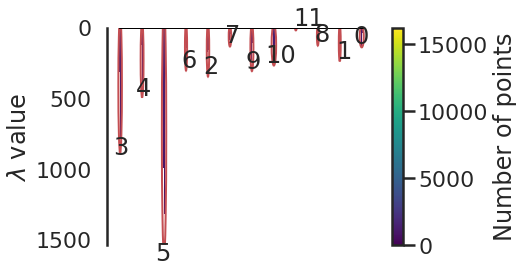

In [100]:
clusterer1.condensed_tree_.plot(select_clusters = True, label_clusters=True)

In [101]:
unique, counts = np.unique(clusterer1.labels_, return_counts=True)

print(np.asarray((unique, counts)).T)

[[  -1 3524]
 [   0 1500]
 [   1  701]
 [   2  899]
 [   3 1312]
 [   4 1065]
 [   5 1611]
 [   6  783]
 [   7  913]
 [   8  648]
 [   9 1106]
 [  10 1670]
 [  11  512]]


In [102]:
data1['Cluster']=clusterer1.labels_

In [103]:
data1

,CAT,COSTX,QTYVAR,Cluster
0,CAT17-B,-289.8802,-2.63,3
1,CAT17-B,289.5527,25.00,3
2,CAT17-C,1111.3121,50.00,5
3,CAT17-B,-266.8633,-9.09,3
4,CAT17-C,-517.0436,-11.11,5
...,...,...,...,...
16239,CAT2-C,316.3834,1.00,-1
16240,CAT2-C,626.9100,1.00,-1
16241,CAT2-C,4959.6974,136.36,-1
16242,CAT2-C,-1322.5860,-100.00,-1


In [104]:
pd.set_option('display.max_columns', None)

In [105]:
for i in unique:
  if i != -1:
    print('Cluster',i)
    print(data1[data1['Cluster']==i].describe(),'\n');
    print('Cluster',i,'vs CAT-ABC\n')
    contingency = pd.crosstab(data1[data1['Cluster']==i].Cluster, data1[data1['Cluster']==i].CAT)
    print(contingency,'\n');

Cluster 0
              COSTX       QTYVAR  Cluster
count   1500.000000  1500.000000   1500.0
mean    -381.783043    14.428573      0.0
std     9306.381650   187.024480      0.0
min   -40013.935000  -100.000000      0.0
25%    -2482.610125   -50.000000      0.0
50%      453.062900     1.000000      0.0
75%     2213.306825     7.410000      0.0
max    39709.661400  2800.000000      0.0 

Cluster 0 vs CAT-ABC

CAT      CAT14-A
Cluster         
0           1500 

Cluster 1
              COSTX        QTYVAR  Cluster
count    701.000000    701.000000    701.0
mean      -1.360238     99.282011      1.0
std     2487.481371   1972.947315      0.0
min   -18208.399200   -100.000000      1.0
25%     -252.592700     -9.380000      1.0
50%       -2.992500     -0.100000      1.0
75%      262.244900      7.140000      1.0
max    16300.129600  47900.000000      1.0 

Cluster 1 vs CAT-ABC

CAT      CAT16-C
Cluster         
1            701 

Cluster 2
              COSTX       QTYVAR  Cluster
count    

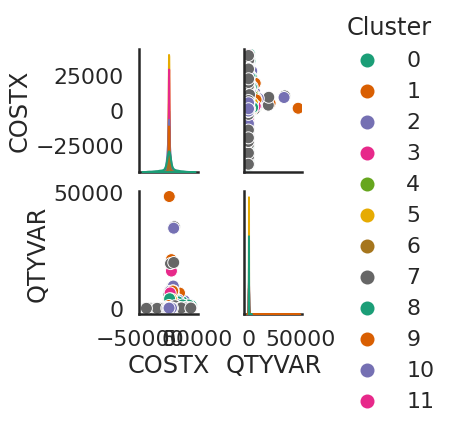

In [173]:
sns.pairplot(data1[data1['Cluster']!=-1],hue='Cluster',palette='Dark2',diag_kind='kde')

**AISLE vs COSTX-QTYVAR**

In [137]:
data2 = dataNoDims

In [138]:
data2 =  data2.drop(['IG','HTS','PLANNING','ABC','CAT','UOM','CONTRPERC'], axis=1)

In [139]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16244 entries, 0 to 16243
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AISLE   16244 non-null  int64  
 1   COSTX   16244 non-null  float64
 2   QTYVAR  16244 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 380.8 KB


In [140]:
data2['AISLE']=data2['AISLE'].astype(str)

In [141]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16244 entries, 0 to 16243
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AISLE   16244 non-null  object 
 1   COSTX   16244 non-null  float64
 2   QTYVAR  16244 non-null  float64
dtypes: float64(2), object(1)
memory usage: 380.8+ KB


In [143]:
data2.sample(5)

,AISLE,COSTX,QTYVAR
2402,15,-315.9592,-16.67
14186,15,208.0234,1.85
6591,17,25.6944,0.28
15423,15,-2626.0770,-100.00
11410,11,-2833.6669,-100.00


In [144]:
# Matriz de distancias de Gower
gowerDistMatrix = gower.gower_matrix(data2)

In [145]:
gowerDistMatrix = np.float64(gowerDistMatrix)

In [146]:
clusterer2 = hdbscan.HDBSCAN(metric='precomputed', min_cluster_size=500)

In [147]:
clusterer2.fit(gowerDistMatrix)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='precomputed', min_cluster_size=500, min_samples=None, p=None,
        prediction_data=False)

In [148]:
np.unique(clusterer2.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

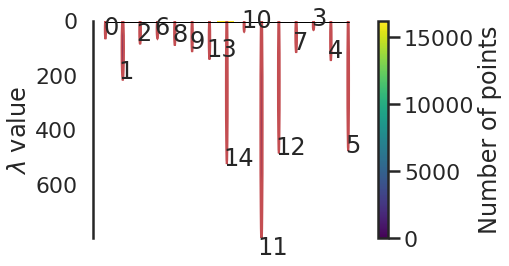

In [149]:
clusterer2.condensed_tree_.plot(select_clusters = True, label_clusters=True)

In [150]:
unique, counts = np.unique(clusterer2.labels_, return_counts=True)

print(np.asarray((unique, counts)).T)

[[  -1 4753]
 [   0  586]
 [   1 1116]
 [   2  805]
 [   3  671]
 [   4  704]
 [   5  785]
 [   6  751]
 [   7  786]
 [   8  636]
 [   9  665]
 [  10  554]
 [  11 1056]
 [  12  826]
 [  13  699]
 [  14  851]]


In [151]:
data2['Cluster']=clusterer2.labels_

In [152]:
data2

,AISLE,COSTX,QTYVAR,Cluster
0,17,-289.8802,-2.63,0
1,17,289.5527,25.00,0
2,17,1111.3121,50.00,0
3,17,-266.8633,-9.09,0
4,15,-517.0436,-11.11,14
...,...,...,...,...
16239,23,316.3834,1.00,-1
16240,21,626.9100,1.00,-1
16241,22,4959.6974,136.36,-1
16242,24,-1322.5860,-100.00,-1


In [153]:
for i in unique:
  if i != -1:
    print('Cluster',i)
    print(data2[data2['Cluster']==i].describe(),'\n');
    print('Cluster',i,'vs AISLE\n')
    contingency = pd.crosstab(data2[data2['Cluster']==i].Cluster, data2[data2['Cluster']==i].AISLE)
    print(contingency,'\n');

Cluster 0
              COSTX       QTYVAR  Cluster
count    586.000000   586.000000    586.0
mean      34.413847    66.181536      0.0
std     2786.155988   601.868054      0.0
min   -20491.224000  -100.000000      0.0
25%     -356.732950   -22.910000      0.0
50%       32.530650     0.845000      0.0
75%      445.004125     8.142500      0.0
max    18995.327400  8200.000000      0.0 

Cluster 0 vs AISLE

AISLE     17
Cluster     
0        586 

Cluster 1
              COSTX        QTYVAR  Cluster
count   1116.000000   1116.000000   1116.0
mean    -325.534106     81.464005      1.0
std     3778.511540   1365.525074      0.0
min   -34549.598200   -100.000000      1.0
25%    -1410.019850   -100.000000      1.0
50%     -100.745900     -7.735000      1.0
75%      713.940875      7.027500      1.0
max    29289.380700  34920.000000      1.0 

Cluster 1 vs AISLE

AISLE       2
Cluster      
1        1116 

Cluster 2
              COSTX       QTYVAR  Cluster
count    805.000000   805.000000  

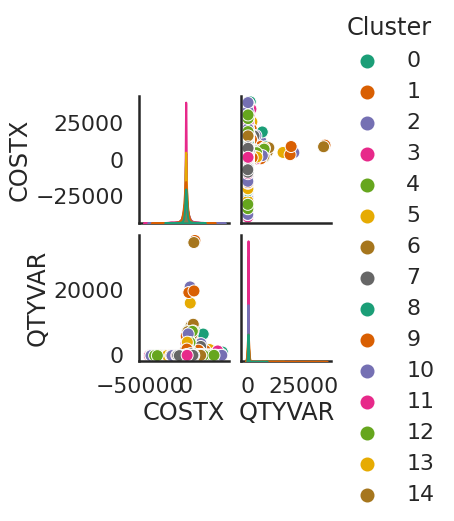

In [171]:
sns.pairplot(data2[data2['Cluster']!=-1],hue='Cluster',palette='Dark2',diag_kind='kde')

**CLUSTERS MAS GRANDES**

In [154]:
data3 = dataNoDims

In [156]:
data3 =  data3.drop(['IG','HTS','PLANNING','ABC','CAT','UOM','CONTRPERC'], axis=1)

In [157]:
data3['AISLE']=data3['AISLE'].astype(str)

In [159]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16244 entries, 0 to 16243
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AISLE   16244 non-null  object 
 1   COSTX   16244 non-null  float64
 2   QTYVAR  16244 non-null  float64
dtypes: float64(2), object(1)
memory usage: 380.8+ KB


In [160]:
# Matriz de distancias de Gower
gowerDistMatrix = gower.gower_matrix(data3)

In [161]:
gowerDistMatrix = np.float64(gowerDistMatrix)

In [162]:
clusterer3 = hdbscan.HDBSCAN(metric='precomputed', min_cluster_size=1000)

In [163]:
clusterer3.fit(gowerDistMatrix)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='precomputed', min_cluster_size=1000, min_samples=None, p=None,
        prediction_data=False)

In [164]:
np.unique(clusterer3.labels_)

array([-1,  0,  1])

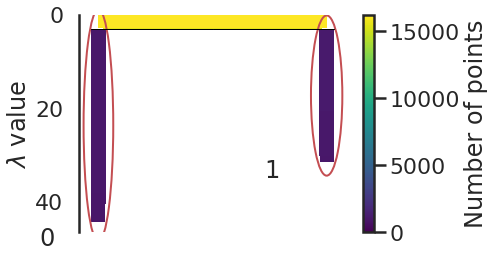

In [165]:
clusterer3.condensed_tree_.plot(select_clusters = True, label_clusters=True)

In [166]:
unique, counts = np.unique(clusterer3.labels_, return_counts=True)

print(np.asarray((unique, counts)).T)

[[   -1 14072]
 [    0  1056]
 [    1  1116]]


In [167]:
data3['Cluster']=clusterer3.labels_

In [168]:
data3

,AISLE,COSTX,QTYVAR,Cluster
0,17,-289.8802,-2.63,-1
1,17,289.5527,25.00,-1
2,17,1111.3121,50.00,-1
3,17,-266.8633,-9.09,-1
4,15,-517.0436,-11.11,-1
...,...,...,...,...
16239,23,316.3834,1.00,-1
16240,21,626.9100,1.00,-1
16241,22,4959.6974,136.36,-1
16242,24,-1322.5860,-100.00,-1


In [169]:
for i in unique:
  if i != -1:
    print('Cluster',i)
    print(data3[data3['Cluster']==i].describe(),'\n');
    print('Cluster',i,'vs AISLE\n')
    contingency = pd.crosstab(data3[data3['Cluster']==i].Cluster, data3[data3['Cluster']==i].AISLE)
    print(contingency,'\n');

Cluster 0
              COSTX       QTYVAR  Cluster
count   1056.000000  1056.000000   1056.0
mean      30.178284    20.274214      0.0
std     1619.568706   325.504896      0.0
min   -16300.602200  -100.000000      0.0
25%     -213.041825   -11.340000      0.0
50%        9.205250     0.365000      0.0
75%      204.172550     5.415000      0.0
max    12317.764800  7700.000000      0.0 

Cluster 0 vs AISLE

AISLE      12
Cluster      
0        1056 

Cluster 1
              COSTX        QTYVAR  Cluster
count   1116.000000   1116.000000   1116.0
mean    -325.534106     81.464005      1.0
std     3778.511540   1365.525074      0.0
min   -34549.598200   -100.000000      1.0
25%    -1410.019850   -100.000000      1.0
50%     -100.745900     -7.735000      1.0
75%      713.940875      7.027500      1.0
max    29289.380700  34920.000000      1.0 

Cluster 1 vs AISLE

AISLE       2
Cluster      
1        1116 



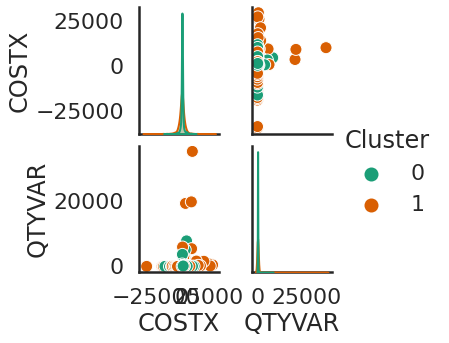

In [170]:
sns.pairplot(data3[data3['Cluster']!=-1],hue='Cluster',palette='Dark2',diag_kind='kde')